## aula de exercicios

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
import plotly.express as px
import seaborn as sns
pd.set_option('display.float_format',lambda x: '%.2f' % x)

from IPython.core.display import HTML

In [2]:
def jupyter_settings():
    %matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize']= [25,12]
    plt.rcParams ['font.size']= 24
    display(HTML ('<style>.container{width:100% !important;} </style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

# plt.figure(figsize=(20,12)) para nao por isso em todo codigo na hora de plotar os graficos

In [3]:
data = pd.read_csv("dataset\kc_house_data.csv")

# 1 - crie uma nova coluna chamada? "dormitory_type"
    #se o valor da coluna 'bedrooms' for igual a 1 => 'studio'
    #se o valor da coluna 'bedrooms' for igual a 2=> 'apartament'
    #se o valor da coluna 'bedrooms' for maior que 2 => 'house'

In [4]:
#se o valor da coluna 'bedrooms' for igual a 1 => 'studio' com for funciona mais apply é mais sucinto
#data['dormitory_type']='NA'
#for i in range( len( data ) ):
#    if data.loc[i, 'bedrooms']== 1:
#        data.loc[i,'dormitory_type']='studio'
#    elif data.loc[i,'bedrooms']==2:
#        data.loc[i,'dormitory_type']='apartament'
#    elif data.loc[i,'bedrooms']>2:
#        data.loc[i,'dormitory_type']='house'

        
data['dormitory_type'] = data['bedrooms'].apply( lambda x: 'studio' if x == 1 else 'apartament' if x == 2 else 'house' if x > 2 else 'NA' )
        

# 2 - faça um grafico de barras que represente a soma dos preços pelo numero de quartos.

<BarContainer object of 13 artists>

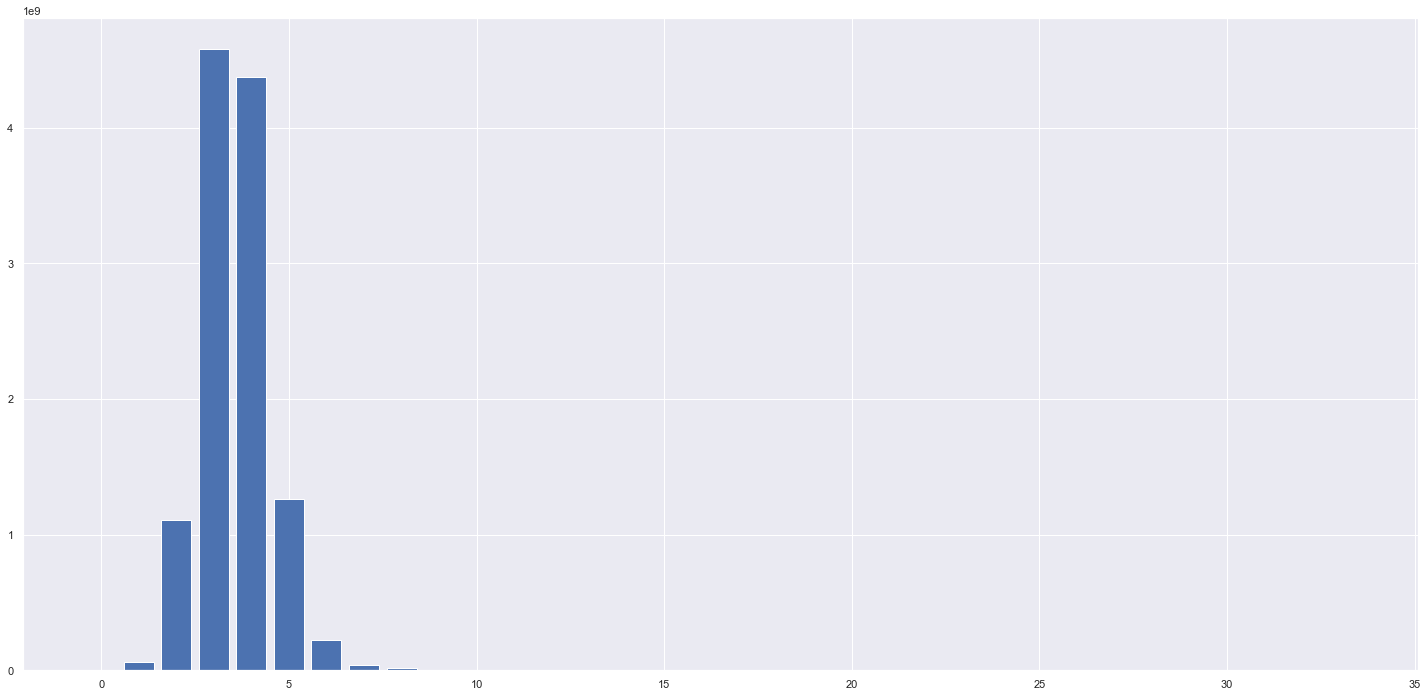

In [5]:
houses=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

#grafico
plt.bar(houses['bedrooms'],houses['price'])

## com seaborn

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

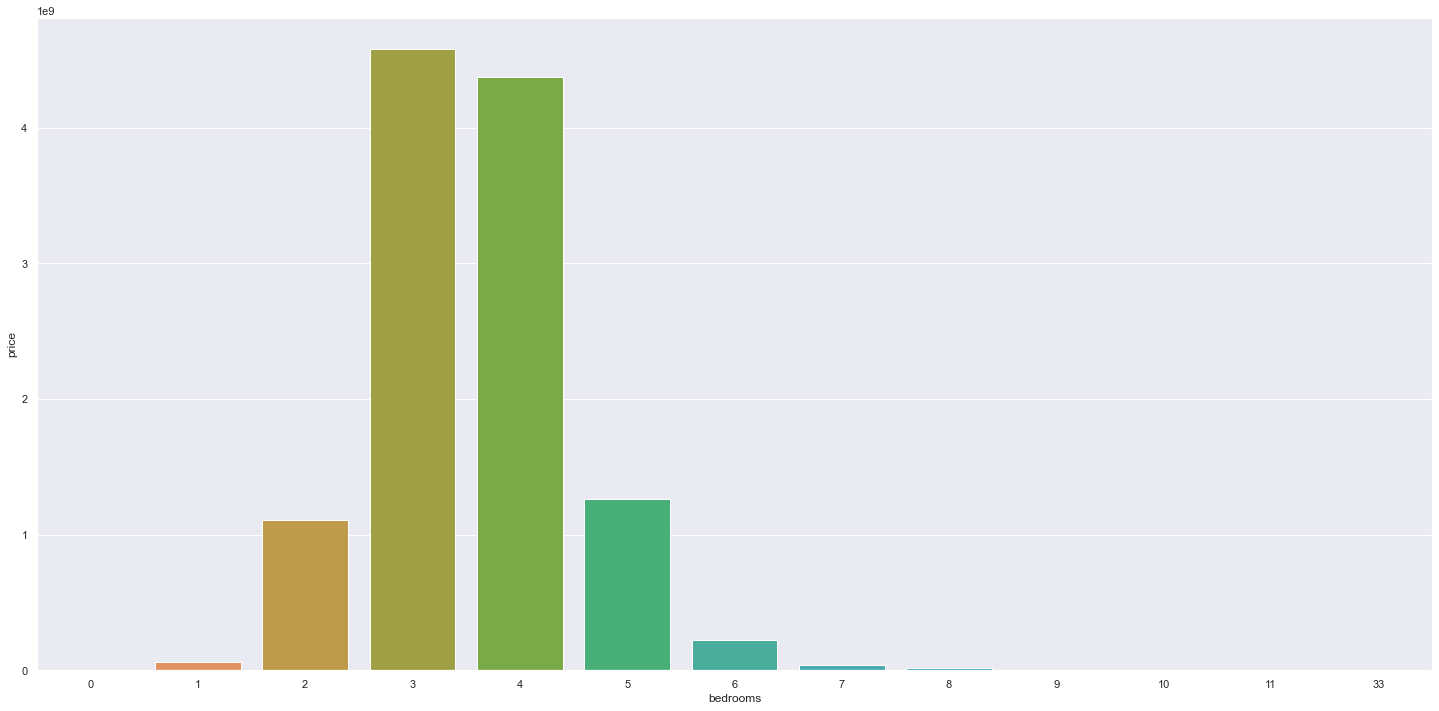

In [6]:
houses=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()


sns.barplot ( x = 'bedrooms', y='price', data=houses)

# 3 - faça um grafico de linhas que represente a média dos preços pelo ano de construção dos imoveis 

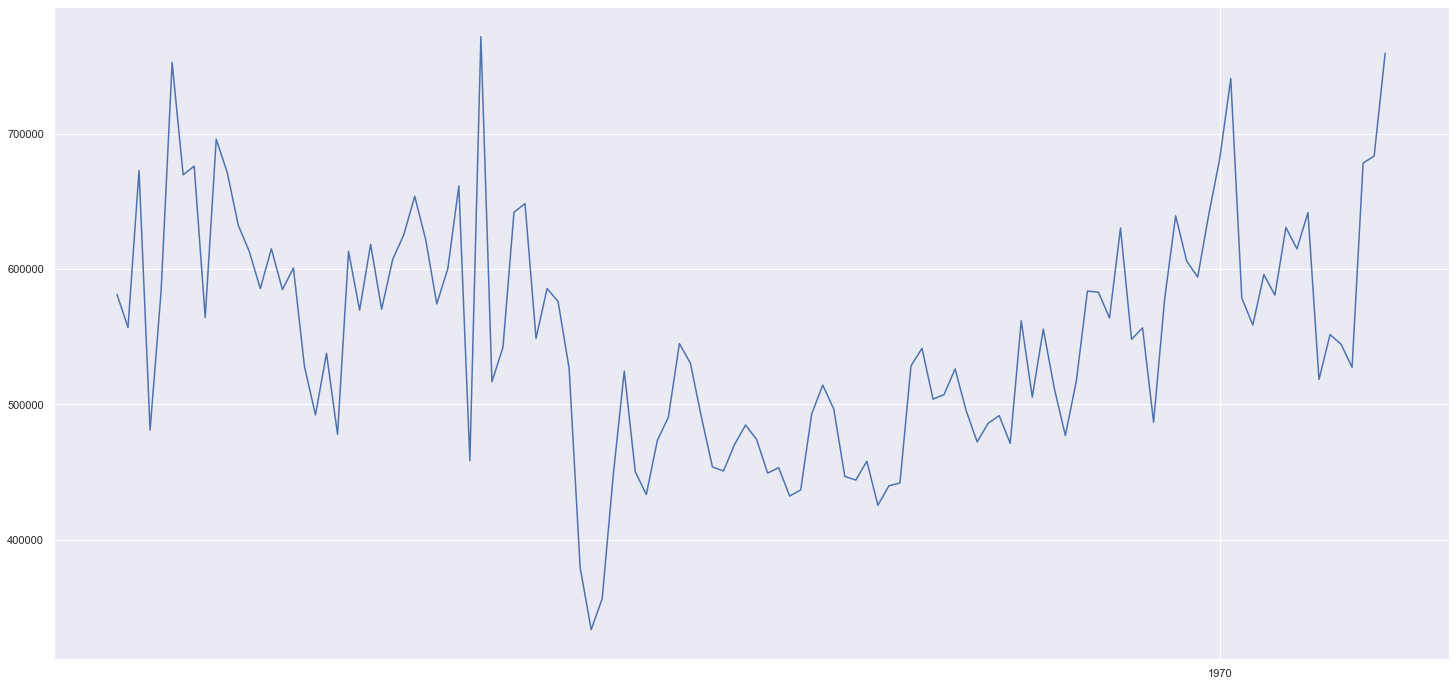

In [7]:
data['yr_built']=pd.to_datetime(data['yr_built'])

houses = data[['price','yr_built']].groupby('yr_built').mean().reset_index()

#grafico

plt.plot(houses['yr_built'],houses['price'])

# com seaborn

<AxesSubplot:xlabel='yr_built', ylabel='price'>

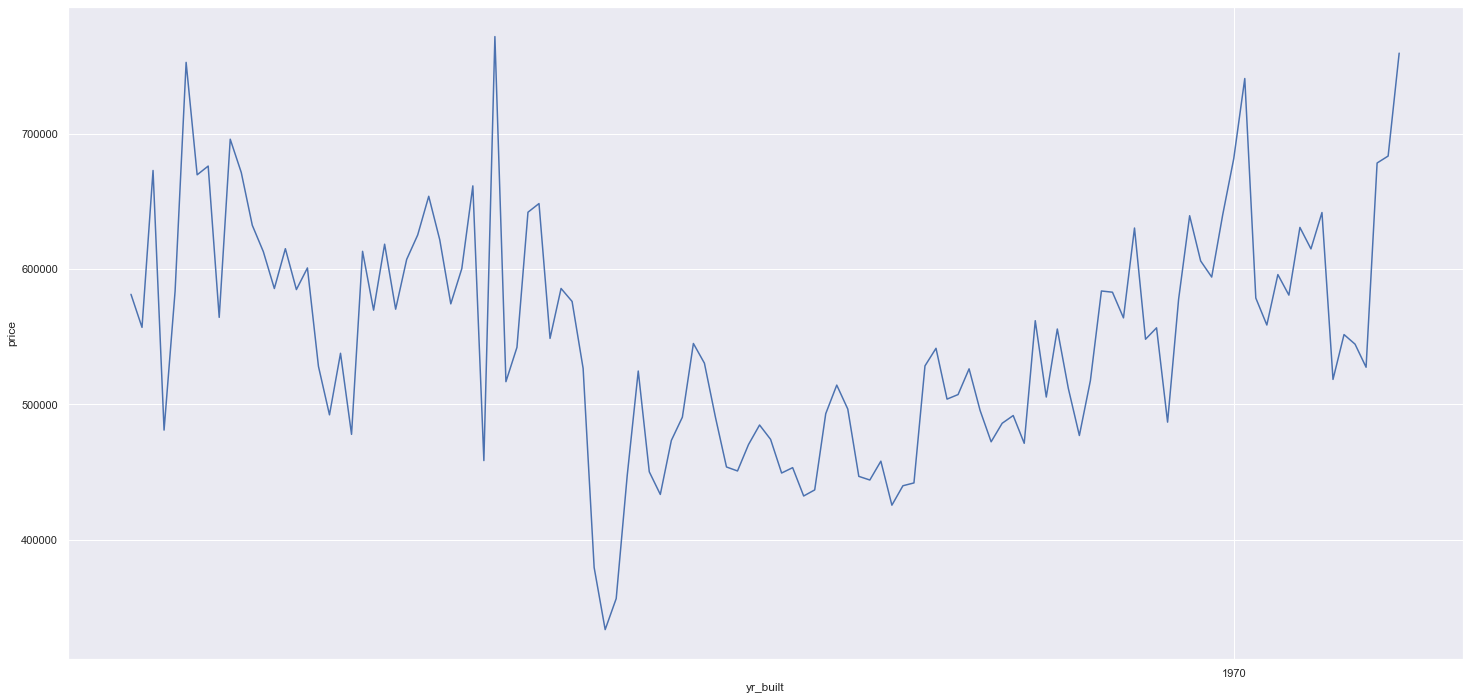

In [8]:
houses = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
#grafico

sns.lineplot (x='yr_built', y='price', data=houses)


# 4 - faça um grafico de barras que represente a média dos preços pelo tipo de dormitorio 

<BarContainer object of 4 artists>

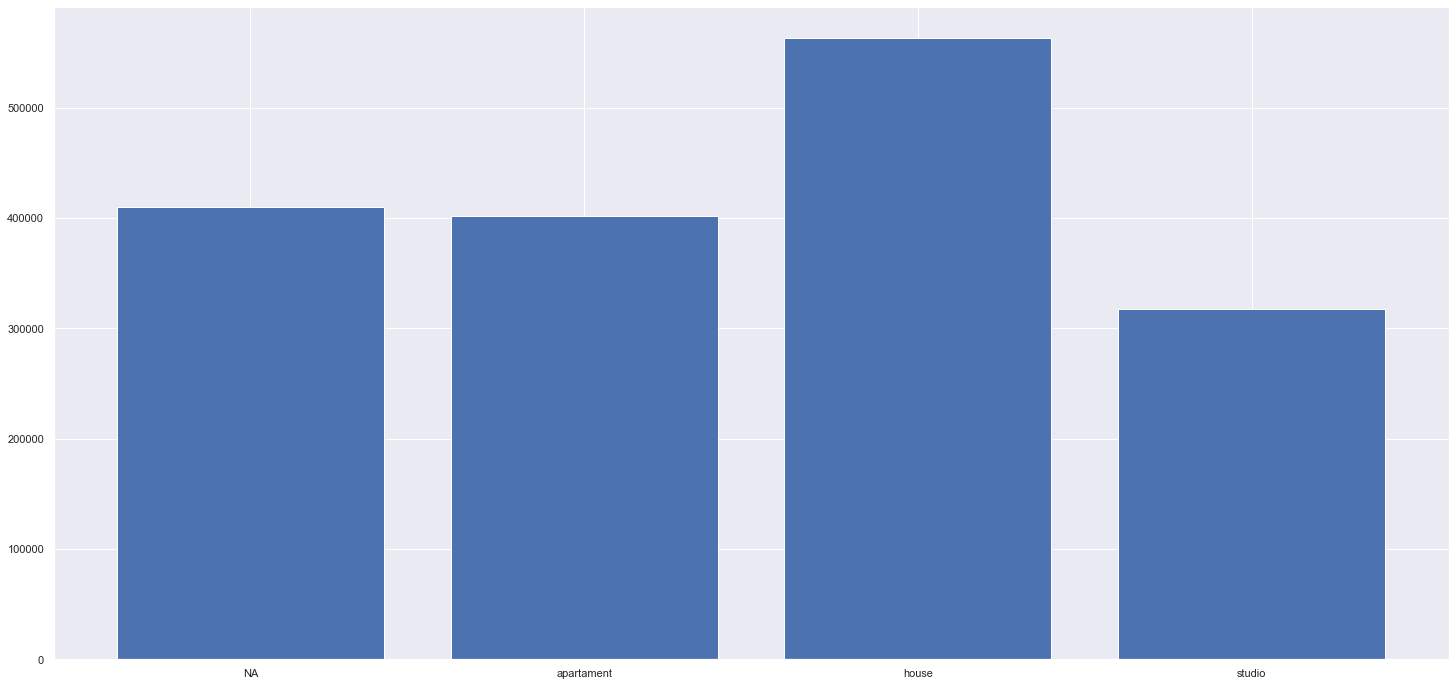

In [9]:
houses = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
#grafico

plt.bar(houses['dormitory_type'],houses['price'])

## com seaborn

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

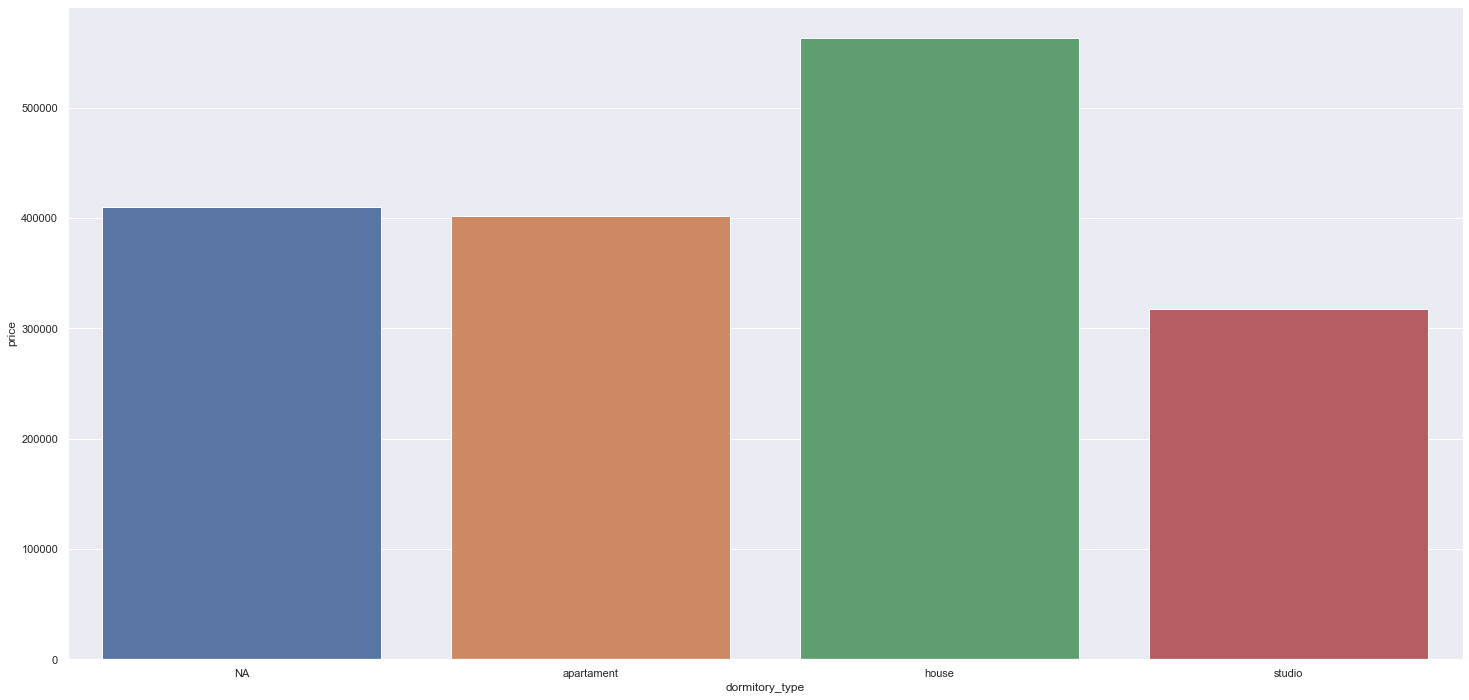

In [10]:
houses = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
#grafico

sns.barplot(x='dormitory_type',y='price', data=houses)

# 5 - faça um grafico de linhas que mostre a evolução da média dos preços
## por ano da reforma dos imóveis, a partir do ano de 1930

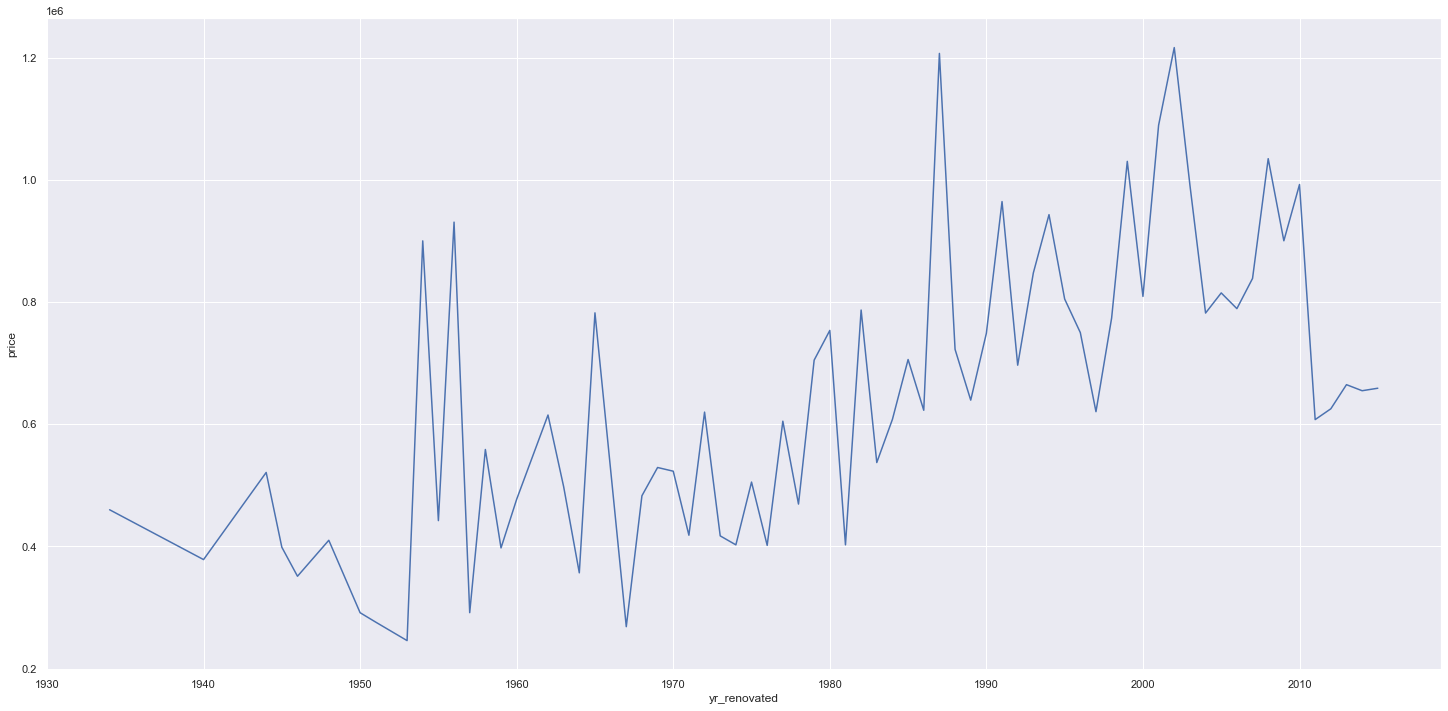

In [11]:
#data['yr_renovated']=pd.to_datetime(data['yr_renovated'])
#for i in range (len(data)):
#        if data.loc[i,'yr_renovated']>=pd.to_datetime(1930):
#            houses=data.loc[i,['yr_renovated','price']]
            
#houses=houses['yr_renovated','price'].groupby('yr_renovated').mean().reset_index()
#grafico
#
#plt.plot(houses['yr_renovated'],houses['price'])


df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated' ).mean().reset_index()
sns.lineplot( x='yr_renovated', y='price', data=df );



# 6 - Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios
## dos imóveis.

In [12]:
houses = data [['price','yr_built','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index()

In [13]:
houses

,yr_built,dormitory_type,price
0,1970-01-01 00:00:00.000001900,apartament,589533.33
1,1970-01-01 00:00:00.000001900,house,584854.27
2,1970-01-01 00:00:00.000001900,studio,398944.00
3,1970-01-01 00:00:00.000001901,apartament,452856.40
4,1970-01-01 00:00:00.000001901,house,578619.17
5,1970-01-01 00:00:00.000001902,apartament,511850.00
6,1970-01-01 00:00:00.000001902,house,709634.09
7,1970-01-01 00:00:00.000001903,apartament,455959.20
8,1970-01-01 00:00:00.000001903,house,496985.29
9,1970-01-01 00:00:00.000001903,studio,170000.00


# 7 - Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas)


<BarContainer object of 4 artists>

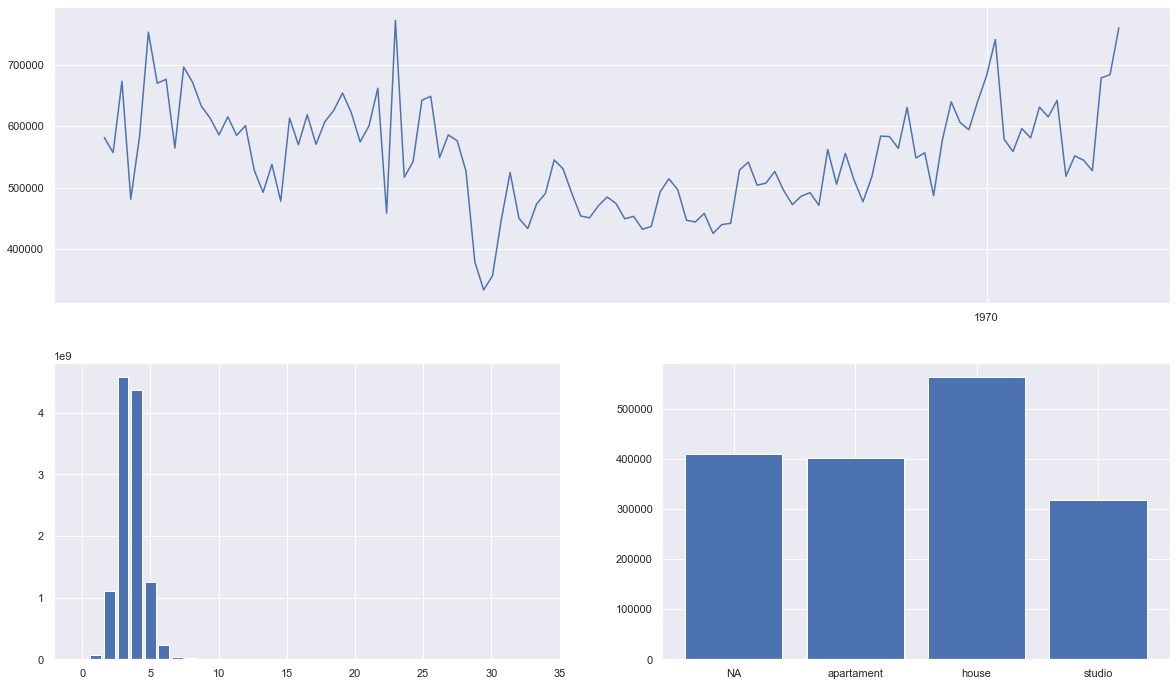

In [14]:
fig = plt.figure (figsize=(20,12))
specs=gridspec.GridSpec (ncols= 2, nrows=2, figure=fig)

ax2=fig.add_subplot (specs [0,  :]) 
ax1=fig.add_subplot (specs [1,  0]) 
ax3=fig.add_subplot (specs [1,  1]) 

houses=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

#grafico
ax1.bar(houses['bedrooms'],houses['price'])

data['yr_built']=pd.to_datetime(data['yr_built'])

houses = data[['price','yr_built']].groupby('yr_built').mean().reset_index()

#grafico
ax2.plot(houses['yr_built'],houses['price'])

#grafico
houses = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()

ax3.bar(houses['dormitory_type'],houses['price'])


# com seaborn

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

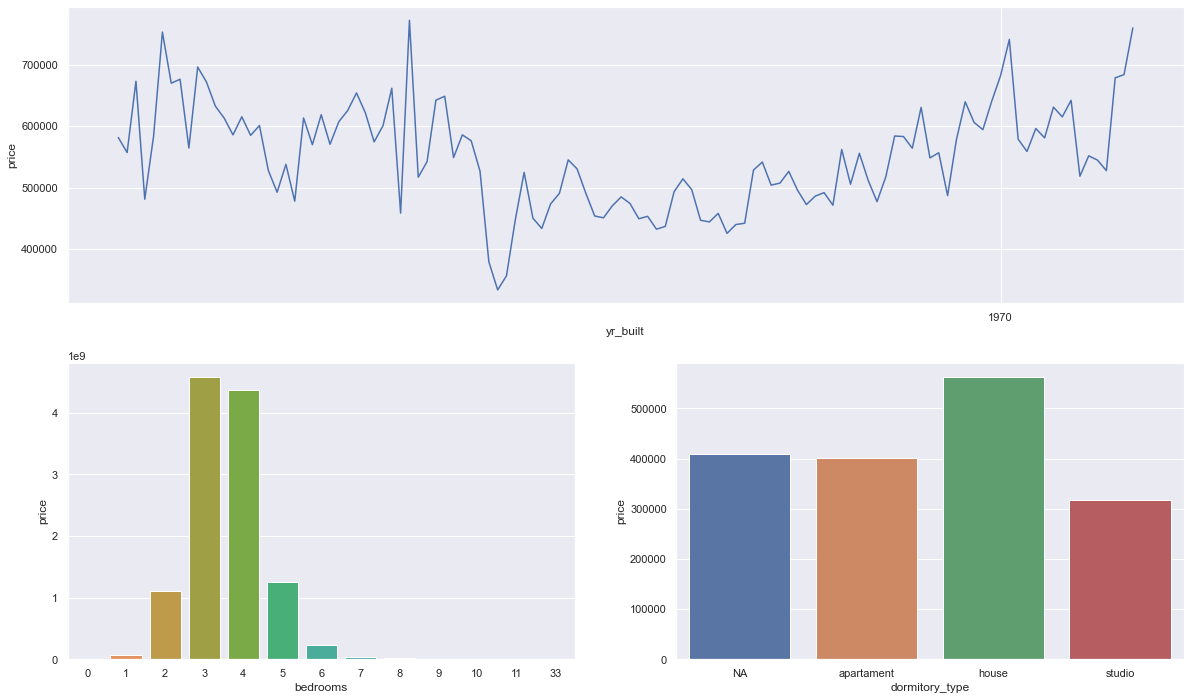

In [15]:
fig = plt.figure (figsize=(20,12))
specs=gridspec.GridSpec (ncols= 2, nrows=2, figure=fig)

ax2=fig.add_subplot (specs [0,  :]) 
ax1=fig.add_subplot (specs [1,  0]) 
ax3=fig.add_subplot (specs [1,  1]) 

houses=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot ( x = 'bedrooms', y='price', data=houses, ax=ax1)

houses = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot (x='yr_built', y='price', data=houses, ax=ax2)

houses = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
sns.barplot(x='dormitory_type',y='price', data=houses, ax=ax3)

# 8 - Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

<BarContainer object of 4 artists>

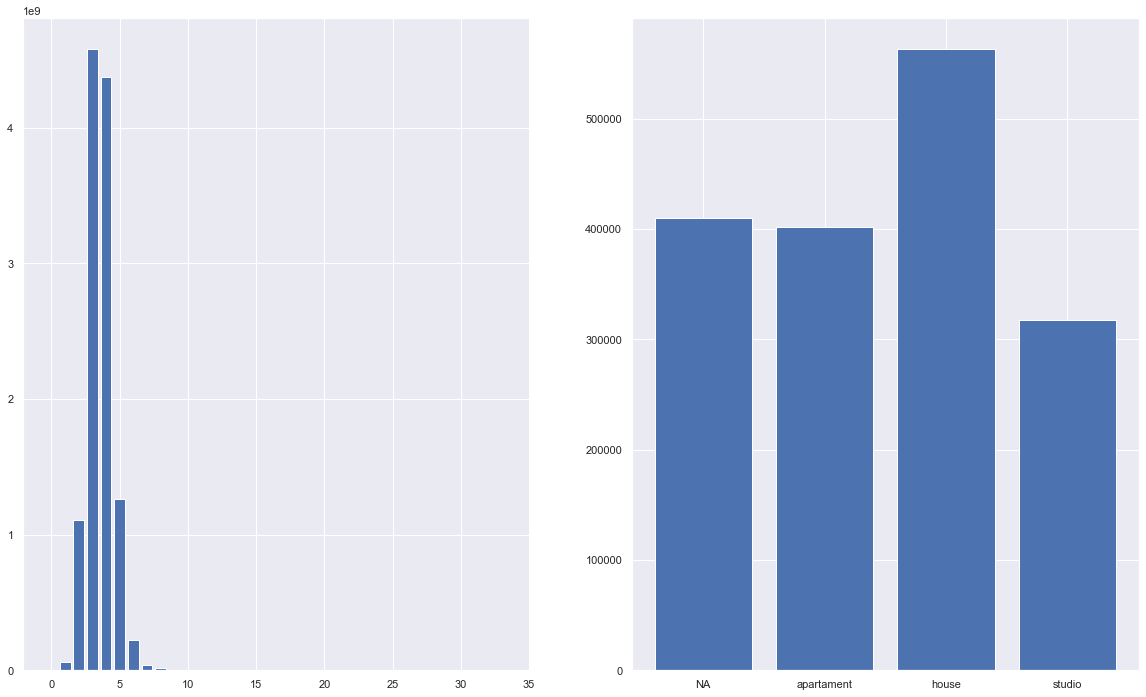

In [16]:
fig = plt.figure (figsize=(20,12))
specs=gridspec.GridSpec (ncols= 2, nrows=1, figure=fig)

ax1=fig.add_subplot (specs [0,  0]) 
ax2=fig.add_subplot (specs [0,  1]) 


houses=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
#grafico
ax1.bar(houses['bedrooms'],houses['price'])


houses = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
#grafico
ax2.bar(houses['dormitory_type'],houses['price'])


# com seaborn

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

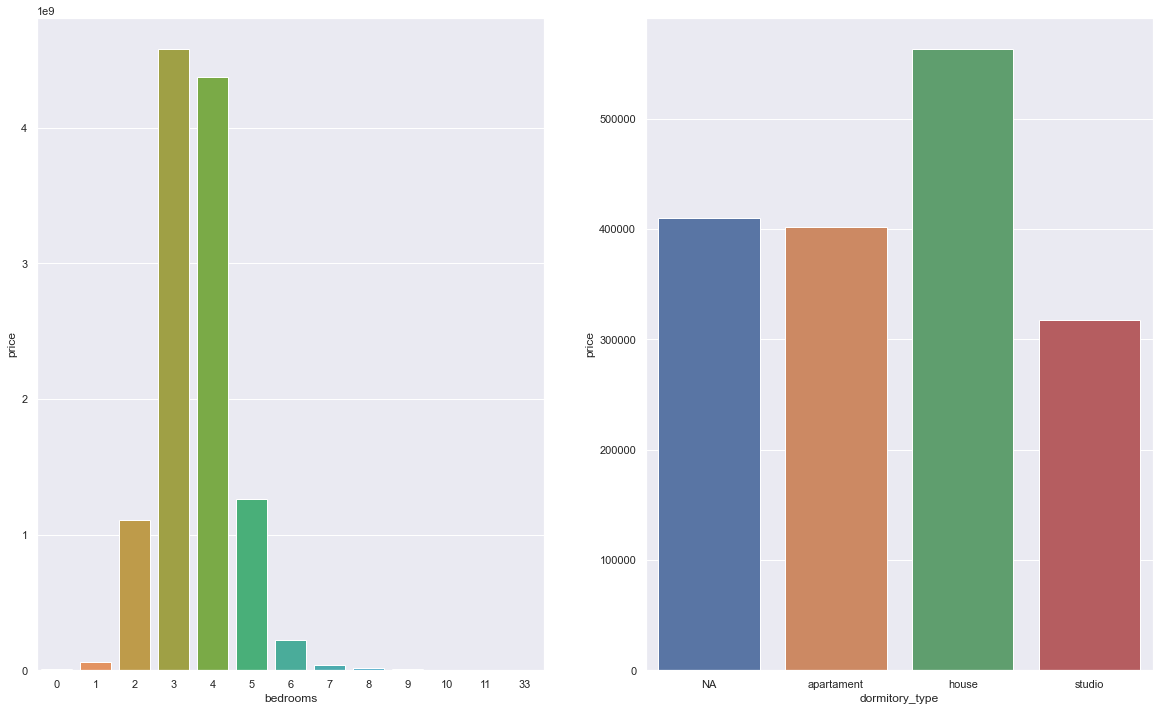

In [17]:
fig = plt.figure (figsize=(20,12))
specs=gridspec.GridSpec (ncols= 2, nrows=1, figure=fig)

ax1=fig.add_subplot (specs [0,  0]) 
ax2=fig.add_subplot (specs [0,  1]) 

houses=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot ( x = 'bedrooms', y='price', data=houses, ax=ax1)

houses = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
sns.barplot(x='dormitory_type',y='price', data=houses, ax=ax2)


# 9 - Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

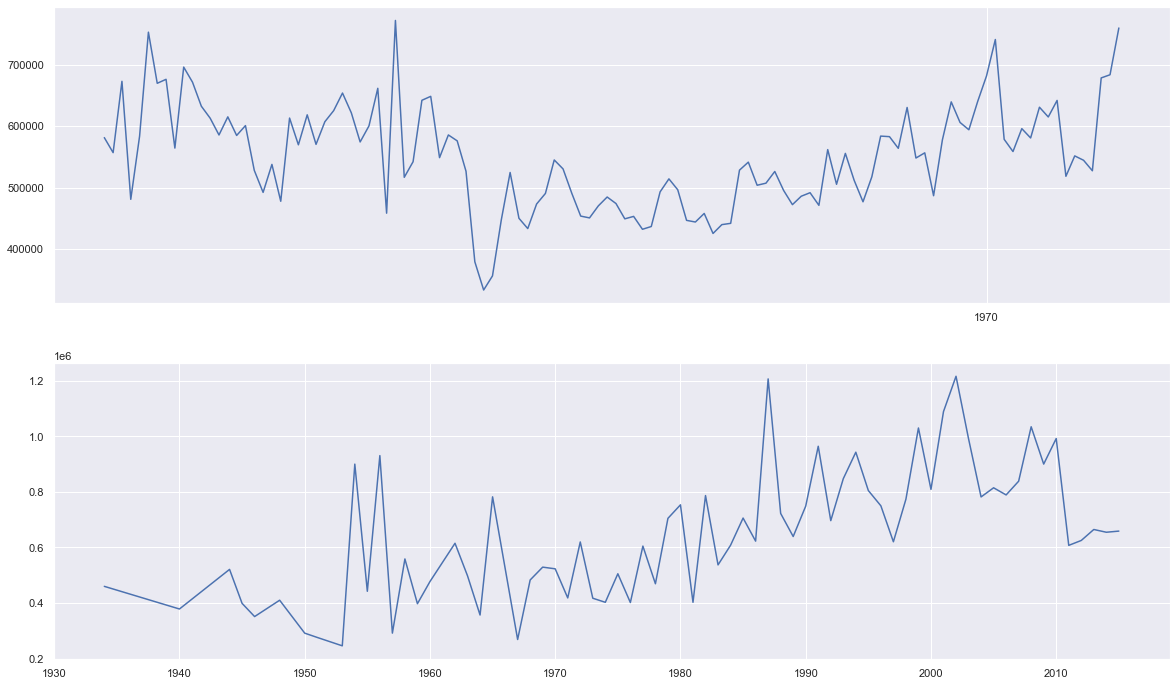

In [18]:
fig = plt.figure (figsize=(20,12))
specs=gridspec.GridSpec (ncols= 1, nrows=2, figure=fig)

ax1=fig.add_subplot (specs [0,  :]) 
ax2=fig.add_subplot (specs [1,  :]) 

data['yr_built']=pd.to_datetime(data['yr_built'])

houses = data[['price','yr_built']].groupby('yr_built').mean().reset_index()

#grafico

ax1.plot(houses['yr_built'],houses['price'])


house = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated' ).mean().reset_index()
ax2.plot(house['yr_renovated'],house['price'])


# com seaborn

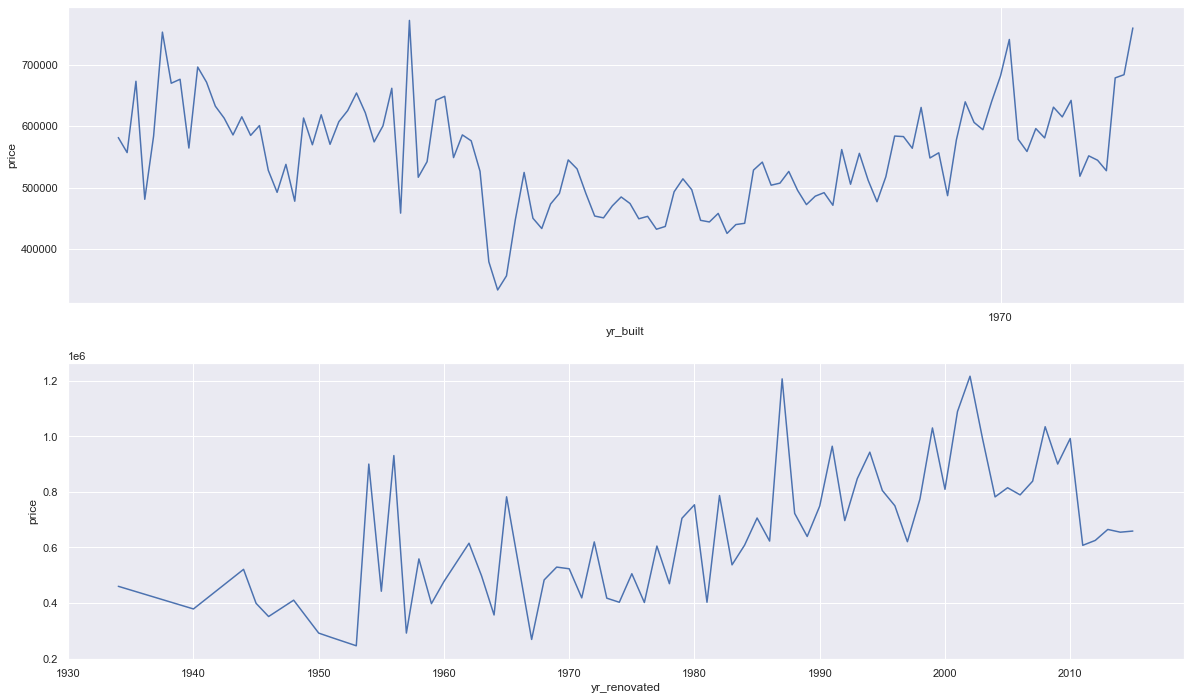

In [19]:
fig = plt.figure (figsize=(20,12))
specs=gridspec.GridSpec (ncols= 1, nrows=2, figure=fig)

ax1=fig.add_subplot (specs [0,  :]) 
ax2=fig.add_subplot (specs [1,  :]) 

houses = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot (x='yr_built', y='price', data=houses, ax=ax1)

df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated' ).mean().reset_index()
sns.lineplot( x='yr_renovated', y='price', data=df, ax=ax2);



# 10 - Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [23]:
house = data [['id','lat','long','price','sqft_living']].copy()

fig= px.scatter_mapbox (house,
                       lat='lat',
                       lon='long',
                       size='price',
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)

fig.update_layout (mapbox_style='open-street-map')
fig.update_layout (height = 600, margin={'r':0,'l':0,'t':0,'b':0})
fig.show()